<img height="180px" src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" align="left" hspace="30px" vspace="50px"/>

# Welcome to your next notebook with SDA!

During the classes we will mostly use [Google Colaboratory](https://colab.research.google.com/?hl=en) which is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

However, for bigger projects, especially involving Deep Learning and/or big data reading, it might be a better choice to setup Jupyter Notebook or Jupyter Lab on your computer. Also, it is worth noticing that there is a great number of useful extensions (see [nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html) and [jupyter-labextension](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)) not available for Colab users.

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# Time to Practice: Custom Models in Keras

**<font color='#4472c4'>PRACTICAL WORKSHOPS WITH SCREEN SHARING BY YOUR MENTOR</font>**

Start by reading through the presentation slides.

<br>

Upon completion of the **<font color='#4472c4'>Custom Models in Keras</font>** module, you will unlock the full potential of deep learning by building neural network models in Keras. This unit will equip you with the skills to design, fine-tune, and deploy tailored models that address specific challenges in AI. You will learn to implement Neural Network architecture using Keras (and TensorFlow) and understand in-depth all steps involved in the learning process. Recall all the elements of Neural Networks and get to understand how such models adjust to the training data.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from keras.models import Sequential  # Sequential API
from keras.layers import Dense
from keras.utils import to_categorical
from keras.regularizers import l1, l2

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Image classification with MNIST dataset

Layers serve as the foundational components of both neural networks and hence also deep learning architectures. They can be thought of as mathematical structures with **<font color='#4472c4'>interconnected neurons and operations that act as data filters or processing tools</font>**. The output data produced by each layer generally exhibits a more informative and valuable form compared to the input data it receives.

**<font color='#4472c4'>Various types of layers exist</font>**, which can be classified based on their position in the model architecture (e.g., input, hidden, output layers) or the specific operations they perform. Examples of layer types include:
* dense (fully connected) layers,
* convolutional layers for spatial data processing,
* pooling layers for dimensionality reduction,
* recurrent layers for sequential data modeling,
* dropout layers for regularization,
* standard L1/L2 regularization
* activation layers for introducing non-linearity,
* normalization,
* and other specialized layers.

By integrating these diverse layer types and arranging them in a specific configuration, deep learning models are capable of effectively processing and extracting valuable insights from complex datasets. The selection and arrangement of layers are crucial design considerations, tailored to the specific task requirements and the characteristics of the input data.

In [2]:
# sequential model initialization
neural_network = Sequential()

# neural network model architecture - add consecutive layers
neural_network.add(
    Dense(512, activation='relu', input_shape=(28 * 28, ))
)
neural_network.add(
    Dense(10, activation='softmax')
)

c:\Users\sevac\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**<font color='#4472c4'>What other elements are necessary for the network to start the training?</font>**

* Loss function:
    * determines how the performance of the network is evaluated and measured during the learning phase
    * quantifies the discrepancy between the predicted outputs of the network and the true values
* Optimizer:
    * responsible for gradually updating the network's parameters (weights and biases) based on the information provided by the loss function
    * employs optimization algorithms, such as stochastic gradient descent (SGD) or its variants, to find the optimal set of parameter values that minimize the loss function
* Metrics (optional):
    * it provides a simple and intuitive measure of how well the network is performing on the given task (e.g. accuracy easier to interpret and explain than binary crossentropy)

In [3]:
# specify loss function, optimization alg., and optional metrics
neural_network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']  # optionally
)

Before we start the training, we need to transform the input data so that it has the shape expected by the network and scale its values to be in the range $[0, 1]$.

Initially, our training images are stored as a 3D tensor of size $(60000, 28, 28)$ that is, 60000 different images of size 28x28 pixels each. The input tensor contains values in the range $[0, 255]$ (of type `uint8`), so we transform it into a 2D tensor, that is a matrix, of dimensions $(60000, 28 * 28)$, which contains values from 0 to 1 (of type `float32`).

...and that's where the data preparation ends!

In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [11]:
from mpl_toolkits.axes_grid1 import ImageGrid

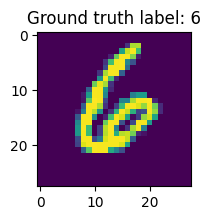

In [7]:
sample_ID = 13

plt.figure(figsize=(2, 2))
plt.imshow(x_train[sample_ID])

plt.title(f"Ground truth label: {y_train[sample_ID]}")
plt.show()

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Generate a graphic that displays 5x5 randomly selected images from the training set side by side in one large graph (grid).

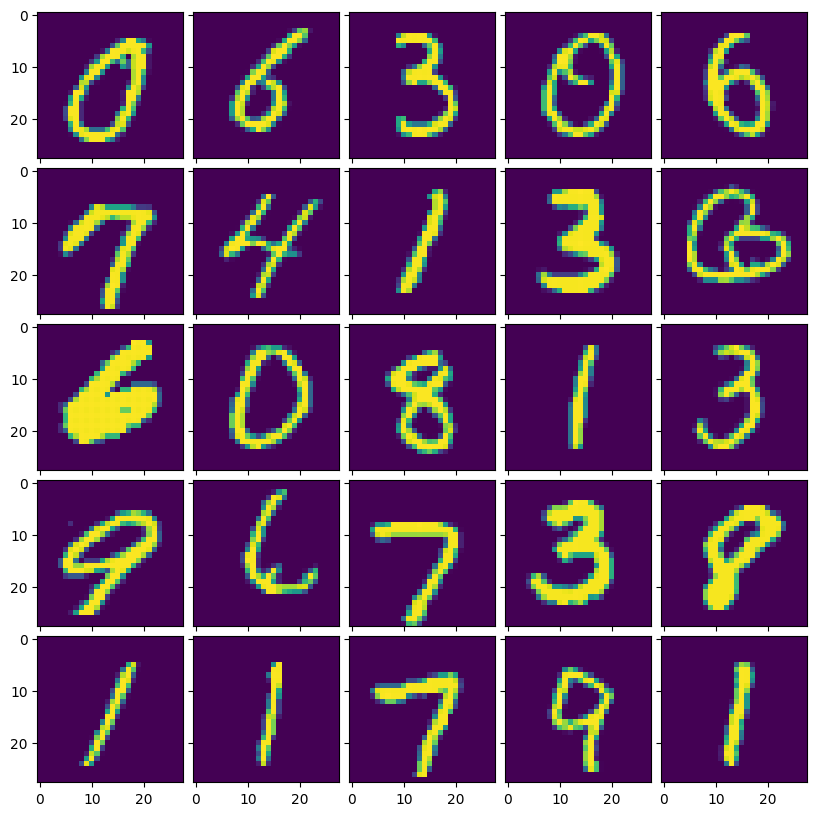

In [15]:
import random as rd

random_images = [x_train[i] for i in rd.sample(range(60000), 25)]
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols= (5,5), axes_pad= 0.1)

for ax, im in zip(grid, random_images):
    ax.imshow(im)




plt.show()

In [16]:
x_train = x_train.reshape((-1, 28 * 28))
x_train = x_train.astype('float32') / 255

In [17]:
x_test = x_test.reshape((-1, 28 * 28))
x_test = x_test.astype('float32') / 255

In [18]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [19]:
# dummy variables / one-hot encoding (OHE)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In Keras, the `.fit()` method is used to train a deep learning model on a given dataset (as it was also in sklearn). It performs the training procedure by iterating over the specified number of epochs, using small batches of data at a time, and optimizing the model's parameters based on the provided data.

The syntax of the `.fit()` method in Keras is as follows (with selected arguments):
```python
Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    workers=1,
    use_multiprocessing=False,
)
```

During the training process, the `.fit()` method automatically performs forward propagation, calculates the loss function, computes the gradients (backpropagation), and updates the model's parameters using the specified optimization algorithm.

This method also provides useful information during the training itself, such as the training loss and optional validation loss. It returns a `History` object that contains these losses and metrics (if specified), which can be used for visualization and further analysis.

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Using the [official keras documentation](https://keras.io/api/models/model_training_apis/) find out the meaning of arguments of the `.fit()` method selected above, then talk to the trainer if you have any doubts.

In [20]:
history = neural_network.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    epochs=50,
    verbose=True
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8399 - loss: 0.5490
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9570 - loss: 0.1505
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9723 - loss: 0.0973
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9798 - loss: 0.0703
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9851 - loss: 0.0529
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9881 - loss: 0.0425
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9918 - loss: 0.0312
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9926 - loss: 0.0272
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9942 - loss: 0.0219
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9965 - loss: 0.0160
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9977 - loss: 0.0126
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/ste

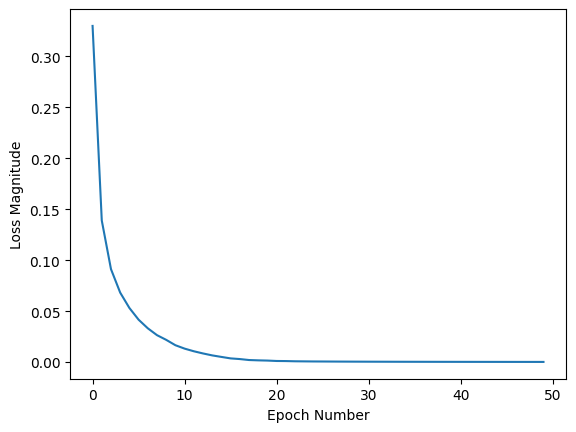

In [21]:
plt.plot(history.history['loss'])

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.show()

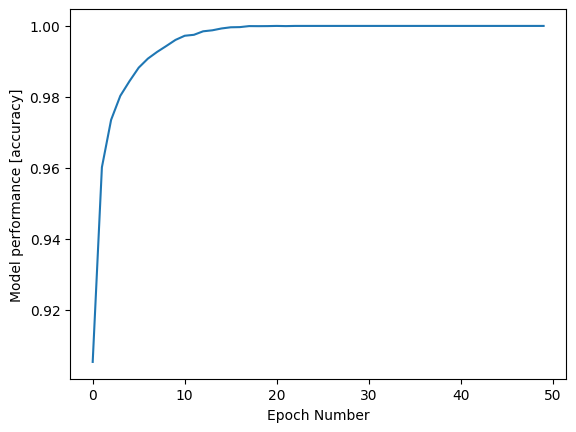

In [22]:
plt.plot(history.history['accuracy'])

plt.xlabel('Epoch Number')
plt.ylabel("Model performance [accuracy]")
plt.show()

In [23]:
y_test_pred = neural_network.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
y_test_pred

array([[1.1135033e-12, 7.1543426e-16, 7.3750719e-12, ..., 1.0000000e+00,
        3.0511653e-13, 1.6130913e-09],
       [3.8411233e-14, 1.4252327e-09, 1.0000000e+00, ..., 2.1475434e-22,
        1.8526214e-12, 3.8777072e-22],
       [2.4029169e-11, 9.9999905e-01, 1.5423439e-07, ..., 3.4449823e-07,
        3.8501619e-07, 7.1111424e-12],
       ...,
       [2.5954480e-21, 6.9051538e-19, 2.9263755e-23, ..., 3.5775473e-11,
        1.4692184e-13, 1.3101426e-11],
       [8.5594878e-13, 5.2516983e-20, 9.0524876e-18, ..., 5.2055151e-16,
        1.2511344e-07, 4.6239818e-18],
       [3.2832061e-14, 7.5406641e-21, 4.6661202e-17, ..., 2.4600944e-23,
        9.5078569e-20, 5.6935188e-19]], dtype=float32)

In [25]:
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test_pred = to_categorical(y_test_pred)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9826

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Image classification with FASHION MNIST dataset

In the previous example, we obtained very high efficiency and generalizability of the model. So let's try it with a slightly more difficult task.

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


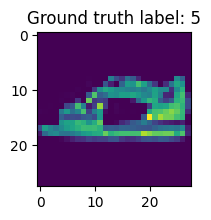

In [ ]:
sample_ID = 13
plt.figure(figsize=(2, 2))
plt.imshow(x_train[sample_ID])

plt.title(f"Ground truth label: {y_train[sample_ID]}")
plt.show()

In [ ]:
x_train = x_train.reshape((-1, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((-1, 28 * 28))
x_test = x_test.astype('float32') / 255

x_train.shape, x_test.shape

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# sequential model initialization
neural_network = Sequential()

# neural network model architecture - add consecutive layers
neural_network.add(
    Dense(512, activation='relu', input_shape=(28 * 28, ))
)
neural_network.add(
    Dense(10, activation='softmax')
)

# specify loss function, optimization alg., and optional metrics
neural_network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = neural_network.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    epochs=50,
    verbose=True
)

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6362 - accuracy: 0.7745
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.8451
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.3705 - accuracy: 0.8641
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3376 - accuracy: 0.8754
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3168 - accuracy: 0.8826
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2963 - accuracy: 0.8909
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2838 - accuracy: 0.8947
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2698 - accuracy: 0.9000
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2596 - accuracy: 0.9040
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2477 - accuracy: 0.9085

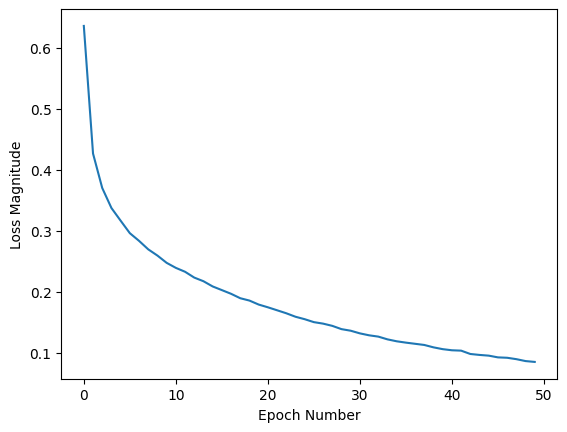

In [ ]:
plt.plot(history.history['loss'])

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.show()

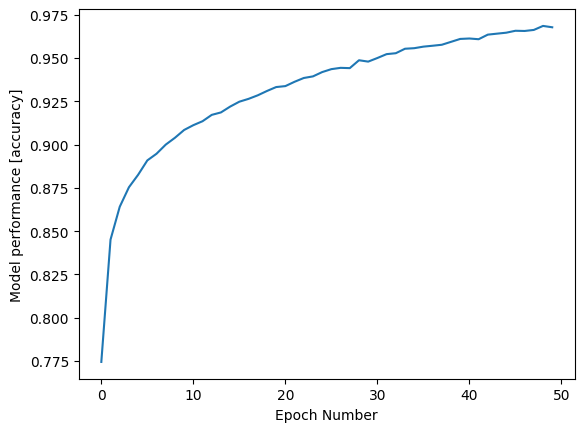

In [ ]:
plt.plot(history.history['accuracy'])

plt.xlabel('Epoch Number')
plt.ylabel("Model performance [accuracy]")
plt.show()

In [ ]:
y_test_pred = neural_network.predict(x_test)

y_test_pred = np.argmax(y_test_pred, axis=1)
y_test_pred = to_categorical(y_test_pred)

accuracy_score(y_test, y_test_pred)

313/313 [==============================] - 1s 2ms/step


0.8891

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Introducing validation set

In [ ]:
# sequential model initialization
neural_network = Sequential()

# neural network model architecture - add consecutive layers
neural_network.add(
    Dense(512, activation='relu', input_shape=(28 * 28, ))
)
neural_network.add(
    Dense(10, activation='softmax')
)

# specify loss function, optimization alg., and optional metrics
neural_network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = neural_network.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    epochs=50,
    verbose=True,
    validation_split=0.2
)

Epoch 1/50
188/188 [==============================] - 2s 5ms/step - loss: 0.6772 - accuracy: 0.7645 - val_loss: 0.5958 - val_accuracy: 0.7739
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4491 - accuracy: 0.8364 - val_loss: 0.4683 - val_accuracy: 0.8257
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3878 - accuracy: 0.8575 - val_loss: 0.4606 - val_accuracy: 0.8293
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3533 - accuracy: 0.8710 - val_loss: 0.3941 - val_accuracy: 0.8533
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3292 - accuracy: 0.8787 - val_loss: 0.3462 - val_accuracy: 0.8763
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3086 - accuracy: 0.8858 - val_loss: 0.4337 - val_accuracy: 0.8462
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.2950 - accuracy: 0.8899 - val_loss: 0.3568 - val_accuracy: 0.8747
Epoch 

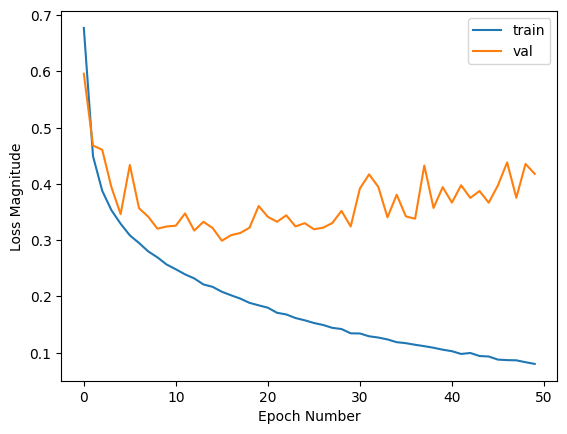

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.legend()
plt.show()

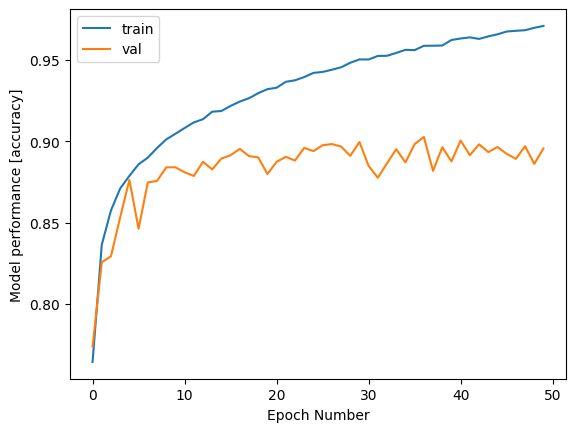

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Model performance [accuracy]")
plt.legend()
plt.show()

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## How to avoid overfitting

There are several types of regulaization techniques that can help you avoid overfitting of the model.

### L1/L2 regularization

The easiest approach, known from classical machine learning algorithms is introducing additional penalty to the cost function value for excessively high parameter values. These are based on L1 and L2 norms:
* L1 regularization - the cost is added proportionally to the absolute values of the weights
* L2 regularization - cost is added proportionally to the squared values of the weights

Note that in the context of neural networks, L2 regularization is also referred to as weight decay.

In TensorFlow, you can simply add the regularization to each layer by specifying `kernel_regularizer` argument with regularizers imported with
```python
from tensorflow.keras.regularizers import L1, L2, L1L2
# alternatively
from keras.regularizers import l1, l2, l1_l2
```

Setting `l2(0.001)` will cause that each element of the layer weight matrix would be multiplied by 0.001 and added to the cost function value. This penalty is only added during training, so the loss during the training will be much higher than during testing.

In [ ]:
# sequential model initialization
neural_network = Sequential()

# neural network model architecture - add consecutive layers
neural_network.add(Dense(
    512,
    activation='relu',
    kernel_regularizer=l2(0.0001),
    input_shape=(28 * 28, )
))
neural_network.add(
    Dense(10, activation='softmax', kernel_regularizer=l2(0.0001))
)

# specify loss function, optimization alg., and optional metrics
neural_network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = neural_network.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    epochs=50,
    verbose=True,
    validation_split=0.2
)

Epoch 1/50
188/188 [==============================] - 1s 5ms/step - loss: 0.7466 - accuracy: 0.7634 - val_loss: 0.5369 - val_accuracy: 0.8341
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.5182 - accuracy: 0.8360 - val_loss: 0.5288 - val_accuracy: 0.8317
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4613 - accuracy: 0.8547 - val_loss: 0.5016 - val_accuracy: 0.8435
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4270 - accuracy: 0.8653 - val_loss: 0.4408 - val_accuracy: 0.8637
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4033 - accuracy: 0.8757 - val_loss: 0.5014 - val_accuracy: 0.8312
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3875 - accuracy: 0.8804 - val_loss: 0.4061 - val_accuracy: 0.8733
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.3753 - accuracy: 0.8839 - val_loss: 0.4464 - val_accuracy: 0.8605
Epoch 

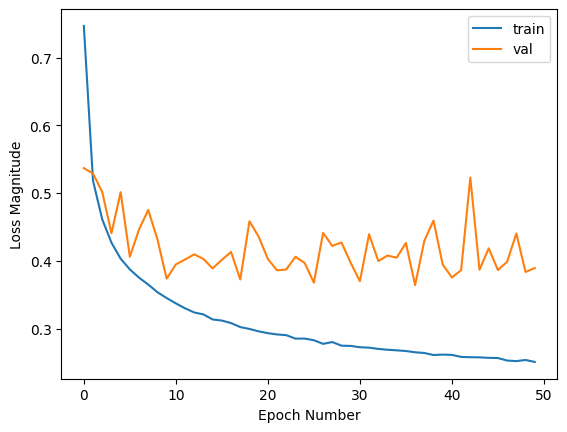

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.legend()
plt.show()

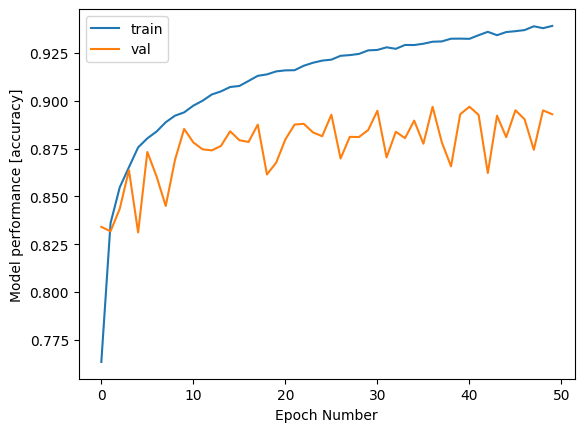

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xlabel('Epoch Number')
plt.ylabel("Model performance [accuracy]")
plt.legend()
plt.show()

In [ ]:
y_test_pred = neural_network.predict(x_test)

y_test_pred = np.argmax(y_test_pred, axis=1)
y_test_pred = to_categorical(y_test_pred)

accuracy_score(y_test, y_test_pred)

313/313 [==============================] - 1s 1ms/step


0.892

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Experiment with regularization and see what type and values work best here. Keep in mind that we want to avoid overtraining but at the same time we cannot reduce the complexity of the model too much.

```python
from keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)
```

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Experiment with regularization not only for weights but also for bias and activation function

```python
layer = layers.Dense(
    # pass,
    kernel_regularizer=regularizers.L1(1e-4),
    bias_regularizer=regularizers.L1L2(1e-4),
    activity_regularizer=regularizers.L2(1e-4))
```

### Dropout

Dropout is commonly used in deep learning to prevent overfitting. It involves randomly deactivating a subset of neurons in a layer during the training process. Dropout forces the network to learn more robust and generalized features by serving as regularization technique as well as in a way an ensemble learning.

In Keras, you can use it as any other layer, simply write:
```python
from tensorflow.keras.layers import Dropout

model = Sequential()

# some layer(s)
model.add(Dropout(0.2))
# other layers
```

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Try to introduce a dropout into the architecture from the previous task. Think where such a layer would make sense? Next, try different values for the proportion of neurons excluded and see how they affect the effectiveness and generalizability of the model.